In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [3]:
# read datasets
df = pd.read_csv('train.csv')
df_copy = df.copy() 
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Task - 1

In [3]:
df_filtered = df[(df['Fuel type'] != 'Diesel') | (df['Prod. year'] >= 2005)]
print('Removed Rows: ',len(df)-len(df_filtered))
print(df_filtered.head())
print(df_filtered.tail())


Removed Rows:  448
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Sil

In [4]:
df_filtered["Levy"] = pd.to_numeric(df_filtered["Levy"], errors="coerce").fillna(0)
average_levy = df_filtered["Levy"].sum() / len(df_filtered)
print(f"Calculated Average Levy: {average_levy:.2f}")

Calculated Average Levy: 644.04


/tmp/ipykernel_239236/2259246492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Levy"] = pd.to_numeric(df_filtered["Levy"], errors="coerce").fillna(0)


## Task - 2 

Model Weight and Bias:  [-1.77629562e-11 -1.81898940e-12  1.68256520e-11  8.18545232e-12
  2.00794425e+05] 18754.909894299082


/tmp/ipykernel_255356/1602488346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Mileage'] = df_selected['Mileage'].str.replace('km','')
/tmp/ipykernel_255356/1602488346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Mileage"] = pd.to_numeric(df_selected["Mileage"], errors="coerce")


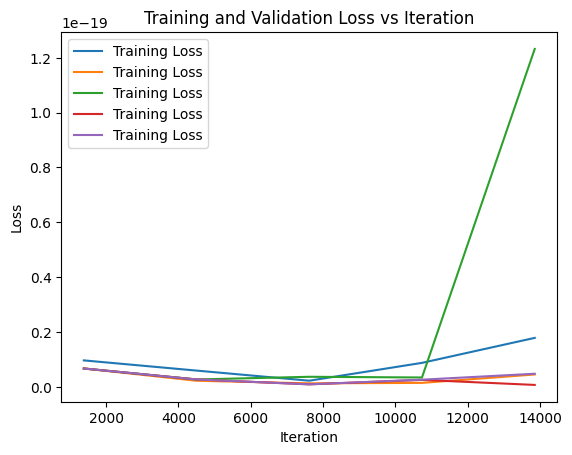

Mean Squared Error: 8.131546560541036e-22


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
selected_features = ['Prod. year', 'Mileage', 'Cylinders', 'Airbags','Price']
df_selected = train[selected_features]
df_selected['Mileage'] = df_selected['Mileage'].str.replace('km','')
df_selected["Mileage"] = pd.to_numeric(df_selected["Mileage"], errors="coerce")
df_selected.head()

train_set, test_set = train_test_split(df_selected, train_size=0.9, random_state=20)
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set[selected_features])
test_set_scaled = scaler.transform(test_set[selected_features])

model = LinearRegression()
model.fit(train_set_scaled, train_set["Price"])
print("Model Weight and Bias: ", model.coef_, model.intercept_)


train_sizes, train_scores, val_scores = learning_curve(
    model,
    train_set_scaled,
    train_set["Price"],
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
)

plt.plot(train_sizes[:1000], -train_scores[:1000], label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training and Validation Loss vs Iteration")
plt.legend()
plt.show()

predictions = model.predict(test_set_scaled)
mse = mean_squared_error(test_set["Price"], predictions)
print(f"Mean Squared Error: {mse}")

/tmp/ipykernel_255356/470570298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.replace('km','')
/tmp/ipykernel_255356/470570298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")


Mean Squared Error: 290842661.3408938
R2 Score: 0.06660519518944275
Model Weight and Bias:  [ 3077.67931619  -146.69026894  2334.32997015 -3984.65996825] 18928.38431535662


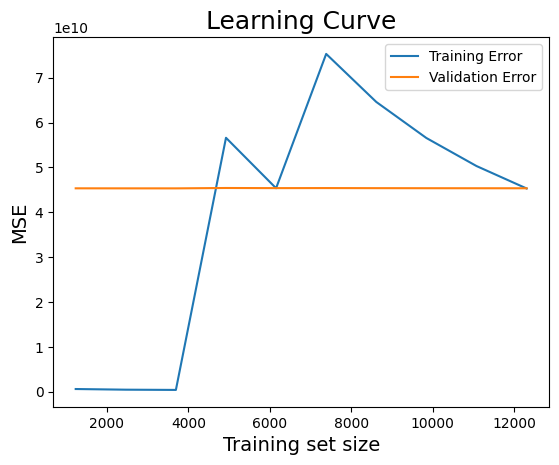

In [11]:
dataframe = pd.read_csv('train.csv')
top_features = ['Prod. year', 'Mileage', 'Cylinders', 'Airbags', 'Price']
df = dataframe[top_features]
df['Mileage'] = df['Mileage'].str.replace('km','')
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Price', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['Price'] = df['Price']

X = df_scaled.drop('Price', axis=1)
y = df_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

print("Model Weight and Bias: ", model.coef_, model.intercept_)



train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="neg_mean_squared_error",
)

train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label="Training Error")
plt.plot(train_sizes, test_scores_mean, label="Validation Error")
plt.ylabel("MSE", fontsize=14)
plt.xlabel("Training set size", fontsize=14)
plt.title("Learning Curve", fontsize=18)
plt.legend()
plt.show()